In [2]:
import pandas as pd
from scipy.stats import loguniform
from pandas import read_csv
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

In [3]:
# Cargar el dataset
datos = pd.read_csv(filepath_or_buffer = "/Users/ninoj/Downloads/diabetes.csv")

In [4]:
datos

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [5]:
# Separar las características y la etiqueta objetivo
X = datos.drop(columns=["Outcome"]).values
y = datos['Outcome'].values

# Separar los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [6]:
# Crear y entrenar el modelo básico (sin optimización)
modelo = LogisticRegression(max_iter=1000)
modelo.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [7]:
# Predicciones con el modelo básico
predicciones = modelo.predict(X_test)

In [8]:
# Calcular métricas antes de la optimización
accuracy_before = accuracy_score(y_test, predicciones)
precision_before = precision_score(y_test, predicciones)
recall_before = recall_score(y_test, predicciones)
f1_before = f1_score(y_test, predicciones)

In [9]:
# Optimización de hiperparámetros con RandomizedSearchCV
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

In [10]:
space = dict()
space['solver'] = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
space['penalty'] = ['none', 'l1', 'l2', 'elasticnet']
space['fit_intercept'] = [True, False]
space['C'] = loguniform(1e-5, 100)
space['tol'] = loguniform(1e-5, 100)
space['warm_start'] = [True, False]

In [11]:
# Realizar la búsqueda aleatoria de hiperparámetros
search = RandomizedSearchCV(modelo, space, n_iter=500, scoring='accuracy', n_jobs=-1, cv=cv, random_state=1)
result = search.fit(X_train, y_train)

C:\Users\ninoj\Desktop\PROYECTOS\uteq\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
9600 fits failed out of a total of 15000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
2004 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\ninoj\Desktop\PROYECTOS\uteq\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ninoj\Desktop\PROYECTOS\uteq\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "C:\Users\ninoj\Desktop\PROYECTOS\uteq\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_const

In [12]:
# Obtener los mejores hiperparámetros
print('Mejor exactitud:', result.best_score_)
print('Mejores Hiperparámetros:', result.best_params_)

Mejor exactitud: 0.7617310065221224
Mejores Hiperparámetros: {'C': np.float64(25.659278964127864), 'fit_intercept': True, 'penalty': 'l1', 'solver': 'liblinear', 'tol': np.float64(0.0011523404777353595), 'warm_start': True}


In [13]:
# Entrenar el modelo con los mejores hiperparámetros encontrados
modelo_optimizado = LogisticRegression(
    C=result.best_params_['C'],
    penalty=result.best_params_['penalty'],
    solver=result.best_params_['solver'],
    tol=result.best_params_['tol'],
    fit_intercept=result.best_params_['fit_intercept'],
    warm_start=result.best_params_['warm_start']
)

In [14]:
modelo_optimizado.fit(X_train, y_train)

LogisticRegression(C=np.float64(25.659278964127864), penalty='l1',
                   solver='liblinear', tol=np.float64(0.0011523404777353595),
                   warm_start=True)

In [15]:
# Predicciones con el modelo optimizado
predicciones_optimizado = modelo_optimizado.predict(X_test)

# Calcular métricas después de la optimización
accuracy_after = accuracy_score(y_test, predicciones_optimizado)
precision_after = precision_score(y_test, predicciones_optimizado)
recall_after = recall_score(y_test, predicciones_optimizado)
f1_after = f1_score(y_test, predicciones_optimizado)

In [16]:
# Comparación de Métricas antes y después de la optimización
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']

In [17]:
# Métricas antes y después de la optimización
before_optimization = [accuracy_before, precision_before, recall_before, f1_before]
after_optimization = [accuracy_after, precision_after, recall_after, f1_after]

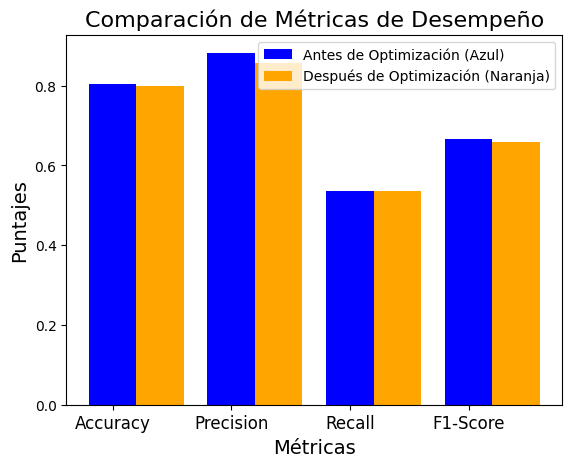

In [18]:
# Crear la gráfica comparativa
x = range(len(metrics))
plt.bar(x, before_optimization, width=0.4, label='Antes de Optimización (Azul)', color='blue', align='center')
plt.bar([p + 0.4 for p in x], after_optimization, width=0.4, label='Después de Optimización (Naranja)', color='orange', align='center')

# Etiquetas y títulos
plt.xlabel('Métricas', fontsize=14)
plt.ylabel('Puntajes', fontsize=14)
plt.title('Comparación de Métricas de Desempeño', fontsize=16)
plt.xticks(x, metrics, fontsize=12)
plt.legend()

# Mostrar la gráfica
plt.show()

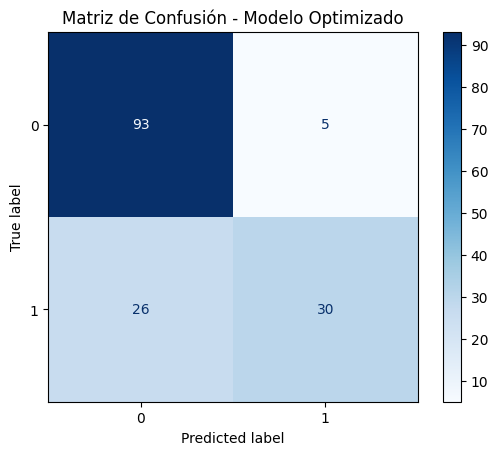

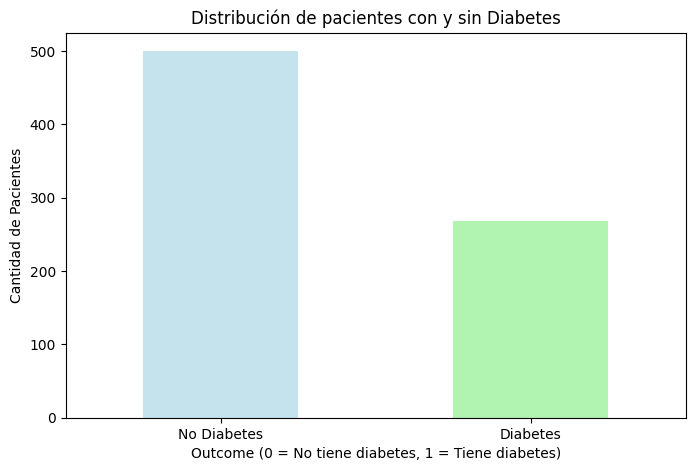

In [19]:
# Generar la matriz de confusión del modelo optimizado
ConfusionMatrixDisplay.from_estimator(modelo_optimizado, X_test, y_test, cmap='Blues')
plt.title("Matriz de Confusión - Modelo Optimizado")
plt.show()

# Mostrar la cantidad de pacientes con y sin diabetes
plt.figure(figsize=(8, 5))
datos['Outcome'].value_counts().plot(kind='bar', color=['lightblue', 'lightgreen'], alpha=0.7)
plt.title('Distribución de pacientes con y sin Diabetes')
plt.xlabel('Outcome (0 = No tiene diabetes, 1 = Tiene diabetes)')
plt.ylabel('Cantidad de Pacientes')
plt.xticks(ticks=[0, 1], labels=['No Diabetes', 'Diabetes'], rotation=0)
plt.show()